In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

In [2]:
from core.utils.preprocessing import df_to_xy
#fix rnd seed
np.random.seed(0)

MAX_GAIN = 200

# Read and sanitize the data
df = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")

# display(df.head())
# df.hist()


In [3]:
from sklearn.linear_model import LinearRegression
from core.utils.preprocessing import df_to_xy

x, y = df_to_xy(df)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 2/5, random_state = 0)



      prop  other_resp  other_prop  time_spent_risk  cells   selfish  \
0     50.0        50.0        50.0         0.282895   0.52  1.000000   
1     50.0        20.0        20.0         0.078947   0.14  0.333333   
2    120.0        50.0        80.0         0.578947   1.00  0.333333   
3     50.0        50.0        50.0         0.157895   1.00  1.000000   
4    100.0        50.0        50.0         0.901316   0.48  1.000000   
5    100.0       100.0        50.0         0.618421   0.32  0.333333   
6    100.0       100.0       100.0         0.953947   0.80  0.666667   
7    120.0       100.0       120.0         0.151316   0.24  0.500000   
8     90.0        80.0        70.0         0.690789   0.74  0.000000   
9     60.0        50.0        45.0         0.401316   1.00  0.416667   
10   100.0       100.0       100.0         0.125000   0.20  0.666667   
11   125.0       110.0       115.0         0.348684   0.40  0.333333   
12   100.0       100.0       100.0         0.427632   0.62  0.66

In [4]:
from core.utils.data_augmentation import DACombine

In [5]:
from core.models.deep import loss_tf, gain_tf, KerasModel

Using TensorFlow backend.


**Metrics**

In [6]:
from core.models.metrics import avg_gain_ratio, gain_mean, avg_loss_ratio

**AcceptanceModel**

In [7]:
from core.models import AcceptanceModel

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


gain_mean:  80.625


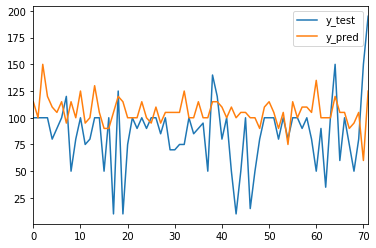

In [8]:
from sklearn.ensemble.bagging import BaggingRegressor, BaggingClassifier, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import NuSVC, SVC, LinearSVC, LinearSVR, SVR, NuSVR

#LinearSVR, zero_one=True: 87
#SVR, zero_one=True: 70

model = AcceptanceModel(LinearSVR(loss='epsilon_insensitive', ), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yTrain_[yTrain_ < 50] = 50

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  8.194444444444445


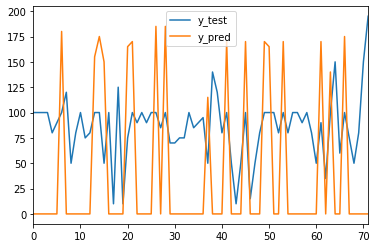

In [9]:
model = AcceptanceModel(SVR(gamma="auto"), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


gain_mean:  81.45833333333333


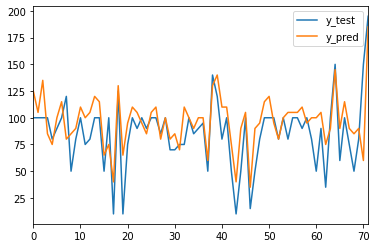

In [10]:
model = AcceptanceModel(LinearSVC(loss='epsilon_insensitive'), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


gain_mean:  1.3194444444444444


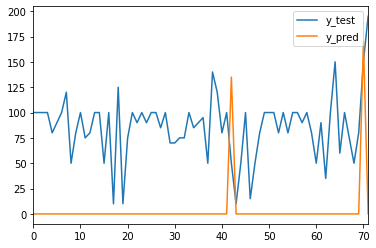

In [11]:
model = AcceptanceModel(PassiveAggressiveClassifier(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


gain_mean:  72.36111111111111


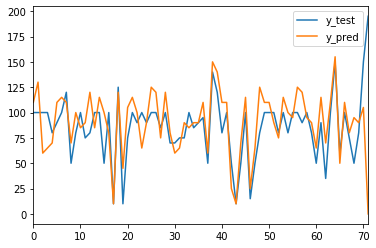

In [12]:
model = AcceptanceModel(LogisticRegression(solver='lbfgs'), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
da = DACombine()
xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=15, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  82.98611111111111


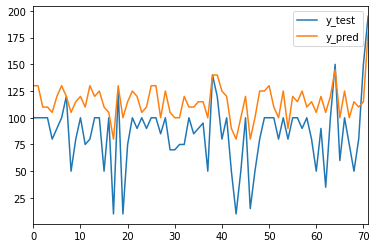

In [13]:
model = AcceptanceModel(LinearRegression(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


gain_mean:  74.30555555555556


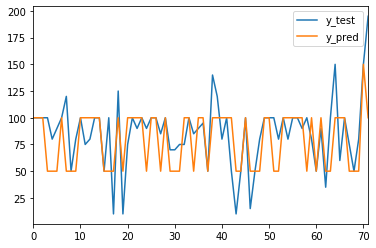

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr')
model.fit(xTrain_, yTrain_.ravel())

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

In [15]:
from core.utils.data_augmentation import DASampling

gxTrain, gyTrain = DASampling().generate_data(xTrain, yTrain, size=10000)

gain_mean:  37.56944444444444
gain ratio:  0.2589794134159123


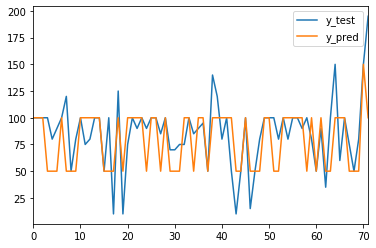

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#model = MLPClassifier(hidden_layer_sizes=(1000,), )
model = PassiveAggressiveClassifier(max_iter=1000, tol=1e-4)
model.fit(gxTrain, gyTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  91.59722222222223
gain ratio:  0.778117325571559


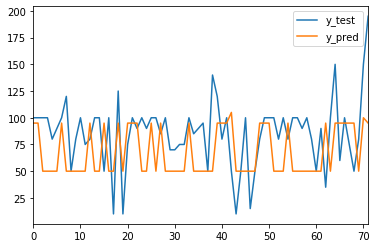

In [17]:
for _ in range(200):
    model.partial_fit(xTrain, yTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

In [18]:
gyTrain.mean(0), yTrain.mean(0), yTest.mean()

(array([78.8275]), array([78.64485981]), 85.83333333333333)